In [1]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
'''
@File    :   pure_reflection_and_pure_transmission_analysis.ipynb
@Time    :   2023/05/08 15:45:23
@Author  :   Roney D. Silva
@Contact :   roneyddasilva@gmail.com
'''
import locale

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import Markdown, display
from ipywidgets import fixed, interact, interactive
from matplotlib import ticker

from bragg import Bragg
from common_functions import *
from mathModelAccel import AccelModelInertialFrame
from pure_reflection_and_pure_transmission_analysis_Functions import *

plt.style.use("./common_functions/roney3.mplstyle")
locale.setlocale(locale.LC_ALL, "pt_BR.UTF-8")
my_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
figL = 6.29
figA = (90.0) / 25.4
plt.rcParams["figure.dpi"] = 288
plt.rcParams["figure.figsize"] = (figL, figA)
# Create a FBG on lambda with 1550nm

accel = AccelModelInertialFrame()
max_deformation = accel.seismic_mass * 9.89 * 0.25 / accel.k / accel.fiber_length
deformation_vector = np.linspace(-max_deformation,
                                 max_deformation,
                                 5,
                                 endpoint=True)
gravity_span_vector = 4.0 * accel.k * accel.fiber_length * deformation_vector / accel.seismic_mass
update_pot_vs_gravity = False


bragg = Bragg(fbg_size=3e-3,
              delta_n=4e-4,
              delta_span_wavelength=1000,
              diff_of_peak=5,
              wavelength_peak=1549.15)
"""FBG 1 bragg instance"""
bragg2 = Bragg(fbg_size=bragg.fbg_size,
               delta_n=bragg.delta_n,
               delta_span_wavelength=500,
               wavelength_span=bragg.wavelength_span,
               wavelength_peak=1549.45)
"""FBG 2 bragg instance"""
laser = 1e-3 * calc_laser(
    w=bragg.wavelength_span, center_w=1549.3 * 1e-9, std=0.025 * 1e-9)
"""Laser Optical source"""
broadband = 1e-3 * 10. / 15. / 1e-9 * np.ones(laser.size)
"""Broadband"""



'Broadband'

# FBG com laser

- FBG 1 com pico em 1549nm
- FBG 2 com pico em 1549.25nm
- Laser com potência de 1mw com pico em 1549.3nm
  - _**O espectro do laser foi normalizado para facilitar a visualização.**_


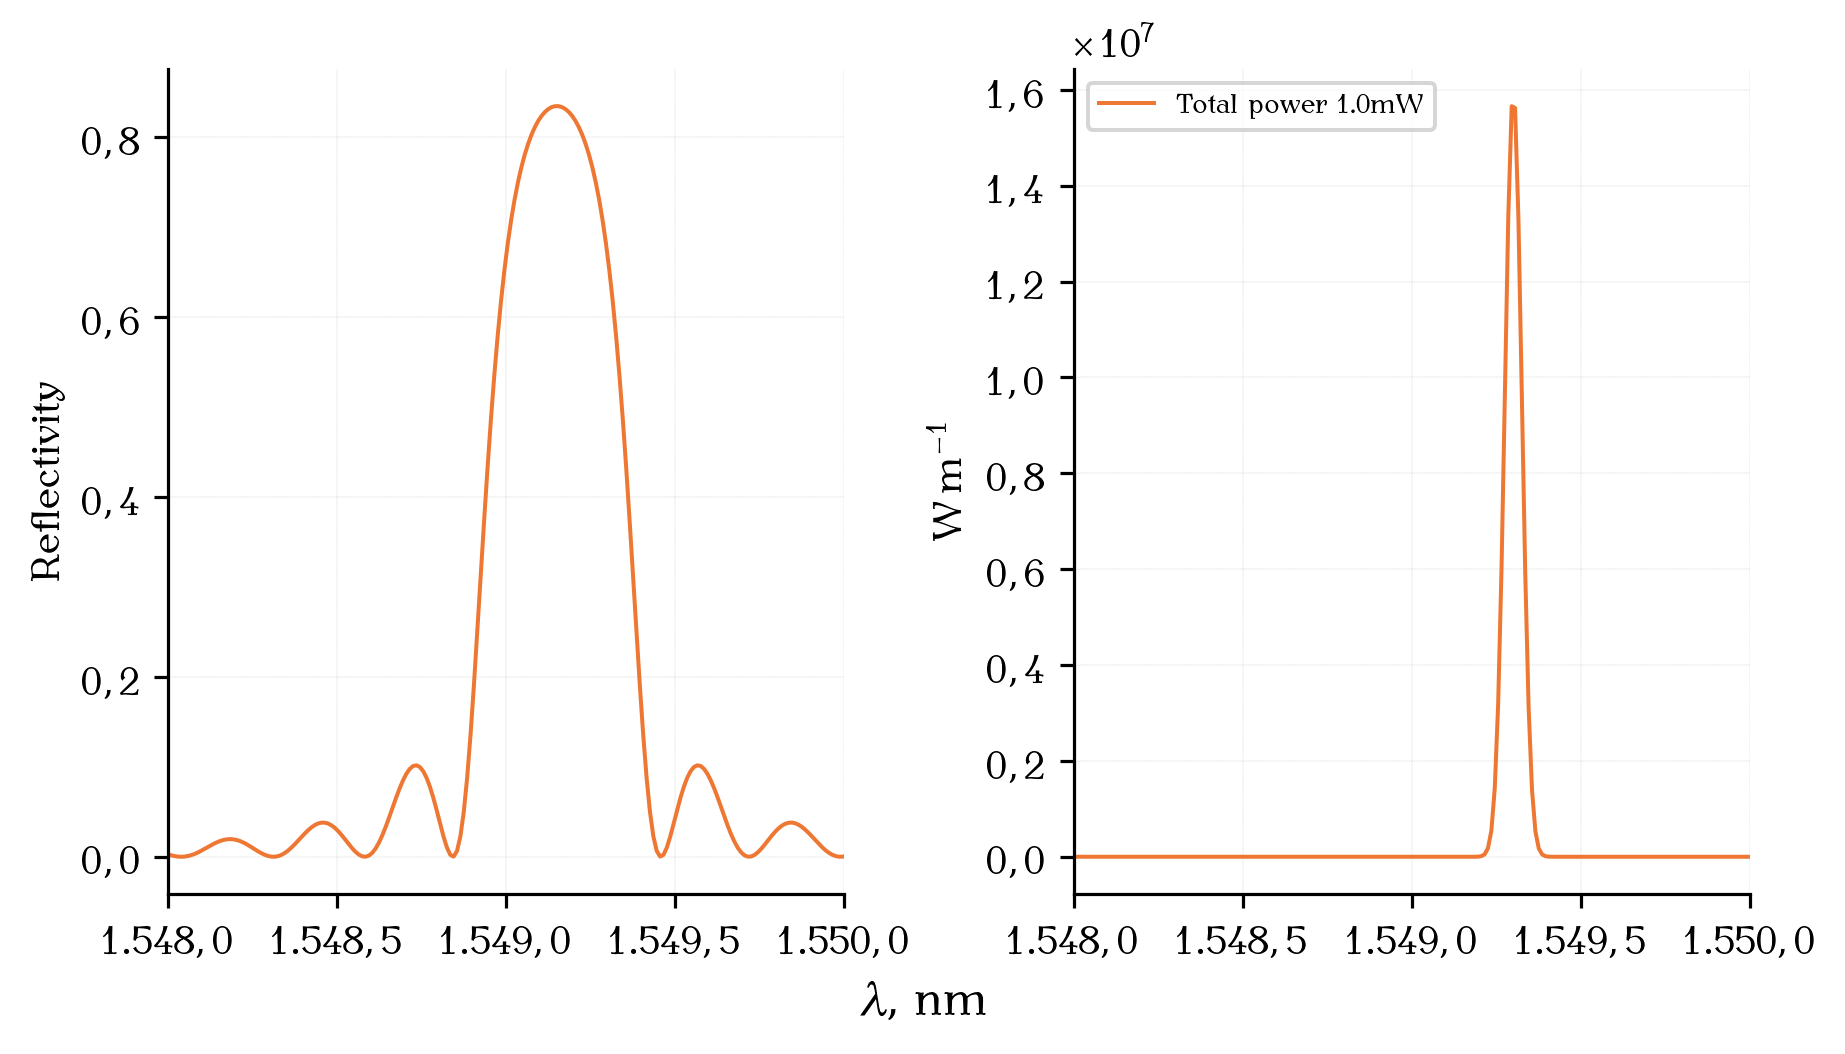

In [2]:
def simple_plot():
    fig, ax = plt.subplots(1, 2, num=1, figsize=(figL, figA))
    ax[0].plot(bragg.wavelength_span_nm, bragg.r0)
    total_power = np.trapz(x=bragg.wavelength_span, y=laser)
    ax[1].xaxis.set_major_locator(ticker.MultipleLocator(.5))

    ax[1].plot(bragg.wavelength_span_nm,
               laser,
               label="Total power " +
               '{:2.1f}'.format(total_power * 1e3) + r"\si{\milli\watt}")
    ax[1].legend()
    # plt.plot(bragg.wavelength_span_nm, laser )
    ax[0].set_ylabel("Reflectivity")
    ax[1].set_ylabel(r"\si{\watt\per\meter}")
    ax[0].set_xlim([1548, 1550])
    ax[1].set_xlim([1548, 1550])
    fig.supxlabel("$\\lambda$, \\si{\\nm}")


simple_plot()


## Transmision (Laser)


In [3]:
Trans = InterrogationClass(bragg1=bragg,
                           optical_source=laser,
                           deformation_vector=deformation_vector,
                           interrogation_function=transmission_interrogation,
                           bragg2=None,
                           interrogation_1_reflection=False,
                           interrogation_2_reflection=None)

interact(Trans.interrogation,
         deformation=(deformation_vector.min(), deformation_vector.max(),
                      deformation_vector[1] - deformation_vector[0]))


interactive(children=(FloatSlider(value=0.0, description='deformation', max=3.426468079409213e-05, min=-3.4264…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

## Reflexão (Laser)


In [4]:
Ref = InterrogationClass(bragg1=bragg,
                         optical_source=laser,
                         deformation_vector=deformation_vector,
                         interrogation_function=reflection_interrogation,
                         bragg2=None,
                         interrogation_1_reflection=True,
                         interrogation_2_reflection=None)

interact(Ref.interrogation,
         deformation=(deformation_vector.min(), deformation_vector.max(),
                      deformation_vector[1] - deformation_vector[0]))


interactive(children=(FloatSlider(value=0.0, description='deformation', max=3.426468079409213e-05, min=-3.4264…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

## Reflexão da reflexão (Laser)


In [5]:
RefRef = InterrogationClass(
    bragg1=bragg,
    optical_source=laser,
    deformation_vector=deformation_vector,
    interrogation_function=reflection_reflection_interrogation,
    bragg2=bragg2,
    interrogation_1_reflection=True,
    interrogation_2_reflection=True)

interact(RefRef.interrogation,
         deformation=(deformation_vector.min(), deformation_vector.max(),
                      deformation_vector[1] - deformation_vector[0]))


interactive(children=(FloatSlider(value=0.0, description='deformation', max=3.426468079409213e-05, min=-3.4264…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

## Transmissão da transmissão (Laser)


In [6]:
TransTrans = InterrogationClass(
    bragg1=bragg,
    optical_source=laser,
    deformation_vector=deformation_vector,
    interrogation_function=transmission_transmission_interrogation,
    bragg2=bragg2,
    interrogation_1_reflection=False,
    interrogation_2_reflection=True)

interact(TransTrans.interrogation,
         deformation=(deformation_vector.min(), deformation_vector.max(),
                      deformation_vector[1] - deformation_vector[0]))


interactive(children=(FloatSlider(value=0.0, description='deformation', max=3.426468079409213e-05, min=-3.4264…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

## Reflexão da transmissão (Laser)


In [7]:
RefTrans = InterrogationClass(
    bragg1=bragg,
    optical_source=laser,
    deformation_vector=deformation_vector,
    interrogation_function=reflection_transmission_interrogation,
    bragg2=bragg2,
    interrogation_1_reflection=True,
    interrogation_2_reflection=False)

interact(RefTrans.interrogation,
         deformation=(deformation_vector.min(), deformation_vector.max(),
                      deformation_vector[1] - deformation_vector[0]))


interactive(children=(FloatSlider(value=0.0, description='deformation', max=3.426468079409213e-05, min=-3.4264…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

## Transmissão da reflexão (Laser)


In [8]:
TransRef = InterrogationClass(
    bragg1=bragg,
    optical_source=laser,
    deformation_vector=deformation_vector,
    interrogation_function=transmission_reflection_interrogation,
    bragg2=bragg2,
    interrogation_1_reflection=False,
    interrogation_2_reflection=True)

interact(TransRef.interrogation,
         deformation=(deformation_vector.min(), deformation_vector.max(),
                      deformation_vector[1] - deformation_vector[0]))


interactive(children=(FloatSlider(value=0.0, description='deformation', max=3.426468079409213e-05, min=-3.4264…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

# FBG com banda larga

- A fonte de banda larga possui uma potência de 10mw com largura de 15nm.
- As FBGs são as mesmas utilizada na simulação do Laser como fonte de luz.
-


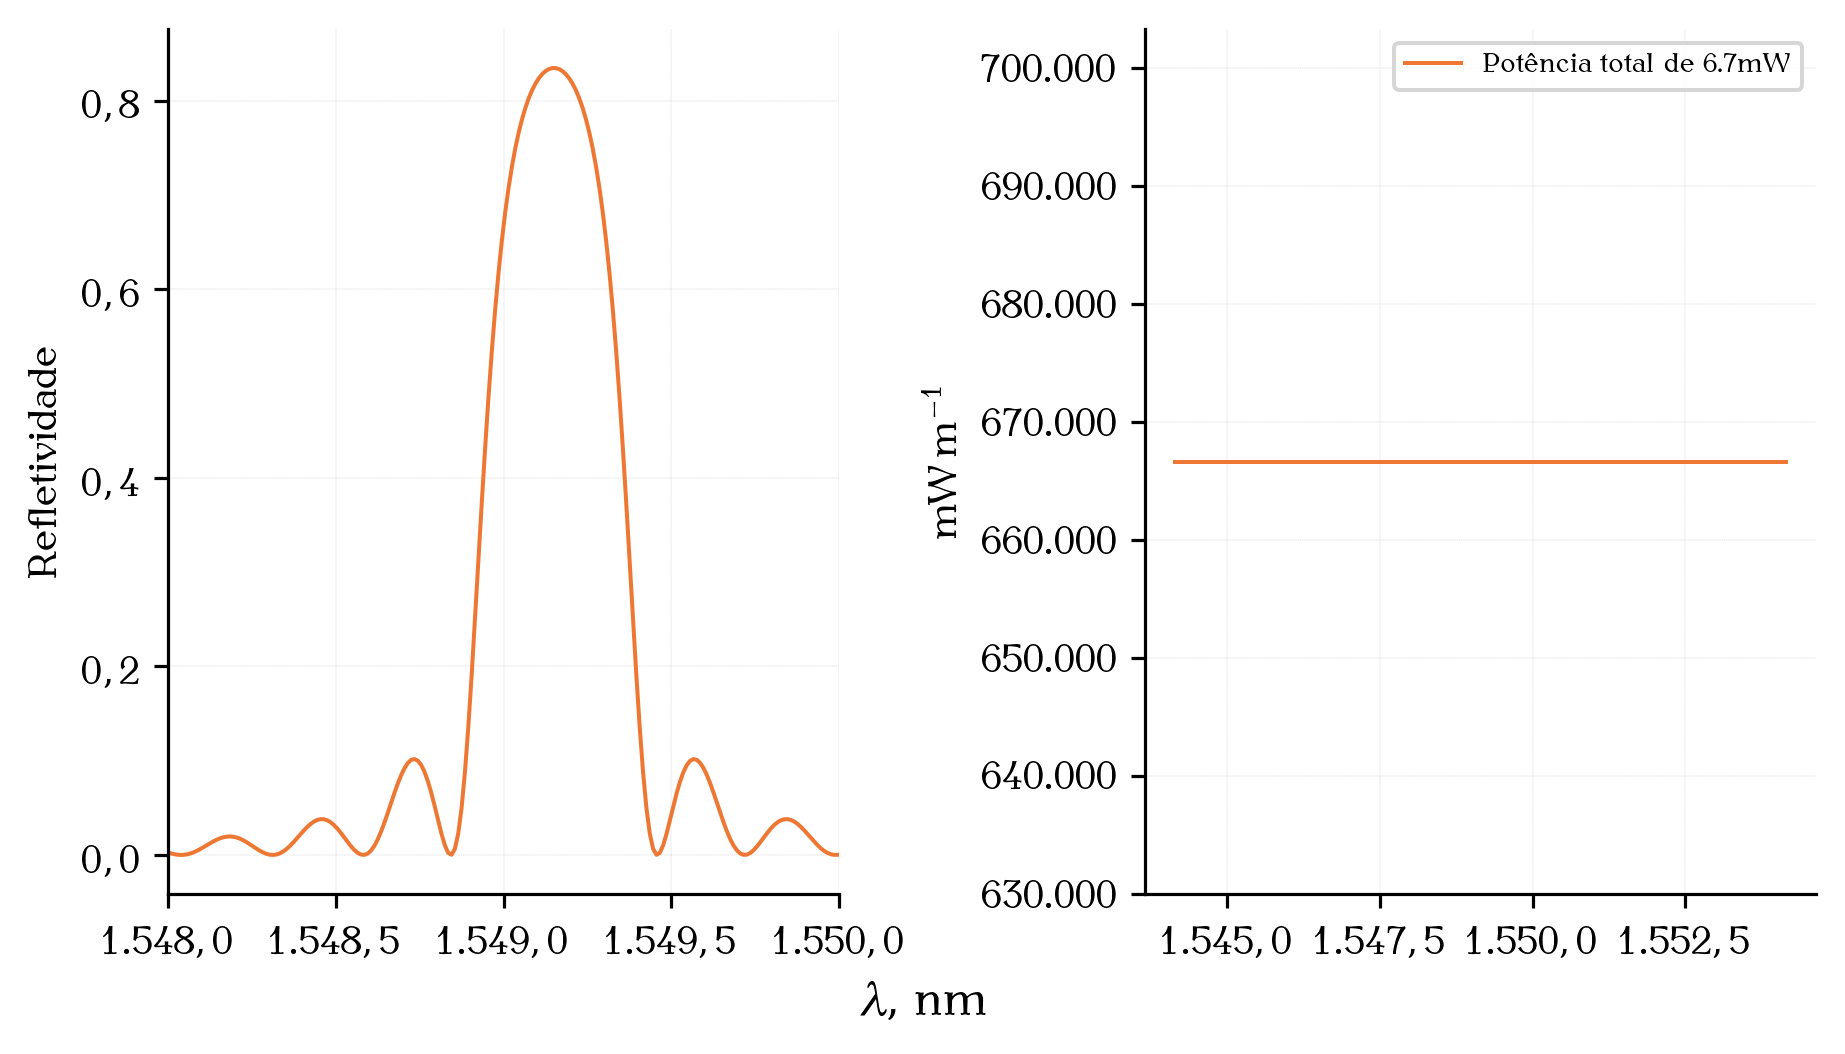

In [9]:
def simple_plot():
    fig, ax = plt.subplots(1, 2, num=1, figsize=(figL, figA))
    ax[0].plot(bragg.wavelength_span_nm, bragg.r0)
    total_power = np.trapz(x=bragg.wavelength_span, y=broadband)
    # ax[1].xaxis.set_major_locator(ticker.MultipleLocator(.5))

    ax[1].plot(bragg.wavelength_span_nm,
               broadband,
               label="Potência total de " +
               '{:2.1f}'.format(total_power * 1e3) + r"\si{\milli\watt}")
    ax[1].legend()
    # plt.plot(bragg.wavelength_span_nm, laser )
    ax[0].set_ylabel("Refletividade")
    ax[1].set_ylabel(r"\si{\milli\watt\per\meter}")
    ax[0].set_xlim([1548, 1550])
    # ax[1].set_xlim([1548, 1550])
    fig.supxlabel("$\\lambda$, \\si{\\nm}")


simple_plot()

## Reflexão da reflexão (Banda Larga)


In [10]:
RefRefBroadband = InterrogationClass(
    bragg1=bragg,
    optical_source=broadband,
    deformation_vector=deformation_vector,
    interrogation_function=reflection_reflection_interrogation,
    bragg2=bragg2,
    interrogation_1_reflection=True,
    interrogation_2_reflection=True)

interact(RefRefBroadband.interrogation,
         deformation=(deformation_vector.min(), deformation_vector.max(),
                      deformation_vector[1] - deformation_vector[0]))


interactive(children=(FloatSlider(value=0.0, description='deformation', max=3.426468079409213e-05, min=-3.4264…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

## Transmissão da transmissão (Broadband)


In [11]:
TransTransBroadband = InterrogationClass(
    bragg1=bragg,
    optical_source=broadband,
    deformation_vector=deformation_vector,
    interrogation_function=transmission_transmission_interrogation,
    bragg2=bragg2,
    interrogation_1_reflection=False,
    interrogation_2_reflection=True,
    optical_source_label="Broadband")

interact(TransTransBroadband.interrogation,
         deformation=(deformation_vector.min(), deformation_vector.max(),
                      deformation_vector[1] - deformation_vector[0]))

interactive(children=(FloatSlider(value=0.0, description='deformation', max=3.426468079409213e-05, min=-3.4264…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

## Reflexão da transmissão (Broadband)


In [12]:
RefTransBroadband = InterrogationClass(
    bragg1=bragg,
    optical_source=broadband,
    deformation_vector=deformation_vector,
    interrogation_function=reflection_transmission_interrogation,
    bragg2=bragg2,
    interrogation_1_reflection=True,
    interrogation_2_reflection=False,
    optical_source_label="Broadband")

interact(RefTransBroadband.interrogation,
         deformation=(deformation_vector.min(), deformation_vector.max(),
                      deformation_vector[1] - deformation_vector[0]))


interactive(children=(FloatSlider(value=0.0, description='deformation', max=3.426468079409213e-05, min=-3.4264…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

## Transmissão da Reflexão (Broadband)


In [13]:
TransRefBroadband = InterrogationClass(
    bragg1=bragg,
    optical_source=broadband,
    deformation_vector=deformation_vector,
    interrogation_function=transmission_reflection_interrogation,
    bragg2=bragg2,
    interrogation_1_reflection=False,
    interrogation_2_reflection=True,
    optical_source_label="Broadband")

interact(TransRefBroadband.interrogation,
         deformation=(deformation_vector.min(), deformation_vector.max(),
                      deformation_vector[1] - deformation_vector[0]))

interactive(children=(FloatSlider(value=0.0, description='deformation', max=3.426468079409213e-05, min=-3.4264…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

# Potência vs aceleração

In [14]:
def all_pot_vs_gravity_Laser():
    fig, ax = plt.subplots(3,
                           2,
                           num=1,
                           sharex=True,
                           figsize=(figL, 0.8 * figA))
    fig.supxlabel(r"Aceleração [g]")
    fig.supylabel("\\si{\\micro\\watt}")

    def plot(_ax, y, label):
        poly_coef = np.polyfit(x=gravity_span_vector / 9.89, y=y * 1e6, deg=1)
        _ax.set_title(r'$p(g)[\si{\micro\watt}]=$' +
                      '{:2.4f}'.format(poly_coef[0]) + r"$\cdot g+$"
                      '{:2.4f}'.format(poly_coef[1]))
        _ax.plot(gravity_span_vector / 9.89, y * 1e6, label=label)
        _ax.legend()

    # Plot reflection vs strain
    plot(ax[0, 0], Trans.pot_photodetector, "Transmissão")
    plot(ax[0, 1], Ref.pot_photodetector, 'Reflexão')
    plot(ax[1, 0], RefTrans.pot_photodetector, 'Reflexão da reflexão')
    plot(ax[1, 1], TransTrans.pot_photodetector, 'Transmissão da transmissão')
    plot(ax[2, 0], RefTrans.pot_photodetector, 'Reflexão da transmissão')
    plot(ax[2, 1], TransRef.pot_photodetector, 'Transmissão da reflexão')

    plt.savefig("../../images/all_interrogation_vs_strain_Laser.pdf",
                format="pdf")
    plt.close(fig=1)


def all_pot_vs_gravity_banda_larga():
    fig, ax = plt.subplots(2,
                           2,
                           num=1,
                           sharex=True,
                           figsize=(figL, 0.8 * figA))
    fig.supxlabel(r"Aceleração [g]")
    fig.supylabel("\\si{\\micro\\watt}")

    def plot(_ax, y, label):
        poly_coef = np.polyfit(x=gravity_span_vector / 9.89, y=y * 1e6, deg=1)
        _ax.set_title(r'$p(g)[\si{\micro\watt}]=$' +
                      '{:2.4f}'.format(poly_coef[0]) + r"$\cdot g+$"
                      '{:2.4f}'.format(poly_coef[1]))
        _ax.plot(gravity_span_vector / 9.89, y * 1e6, label=label)
        _ax.legend()

    # Plot reflection vs strain
    plot(ax[0, 0], RefRefBroadband.pot_photodetector, 'Reflexão da reflexão')
    plot(ax[0, 1], TransTransBroadband.pot_photodetector,
         'Transmissão da transmissão')
    plot(ax[1, 0], RefTransBroadband.pot_photodetector,
         'Reflexão da transmissão')
    plot(ax[1, 1], TransRefBroadband.pot_photodetector,
         'Transmissão da reflexão')

    plt.savefig("../../images/all_interrogation_vs_strain_banda_larga.pdf",
                format="pdf")
    plt.close(fig=1)


all_pot_vs_gravity_Laser()
all_pot_vs_gravity_banda_larga()